In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("../data/loan_data.csv")

In [3]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape


(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [9]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
from sklearn.preprocessing import  LabelEncoder

le=LabelEncoder()

categorical_cols=[
    'Gender','Married','Dependents',
    'Education','Self_Employed',
    'Property_Area','Loan_Status'
]

for col in categorical_cols:
    df[col]=le.fit_transform(df[col])

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [16]:
x=df.drop(['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']

In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

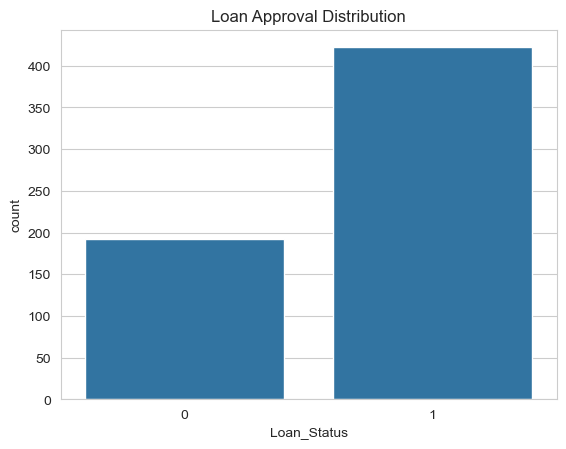

In [19]:
sns.countplot(x='Loan_Status',data=df)
plt.title("Loan Approval Distribution")
plt.show()

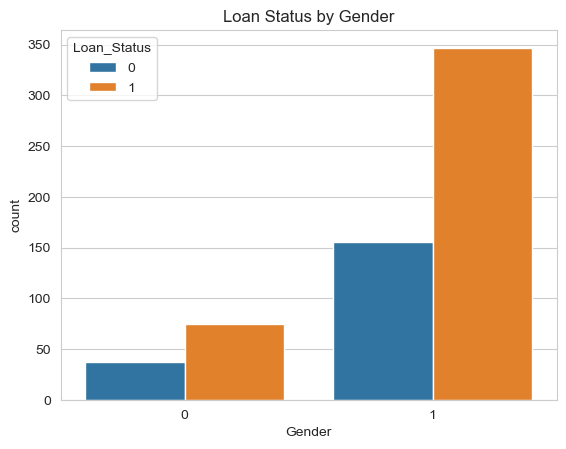

In [20]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)
plt.title('Loan Status by Gender')
plt.show()

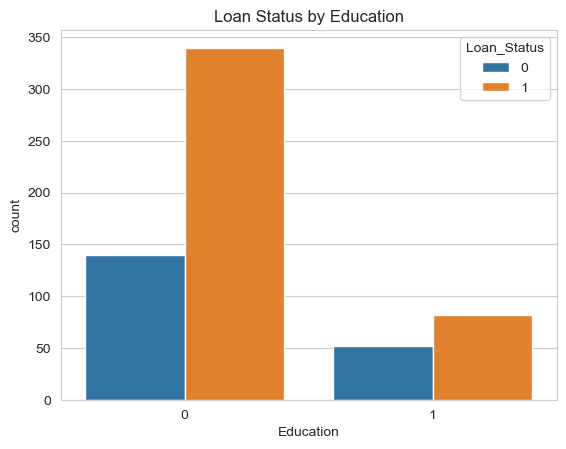

In [21]:
sns.countplot(x='Education',hue='Loan_Status',data=df)
plt.title("Loan Status by Education")
plt.show()

Text(0.5, 1.0, 'Loan Status by Credit History')

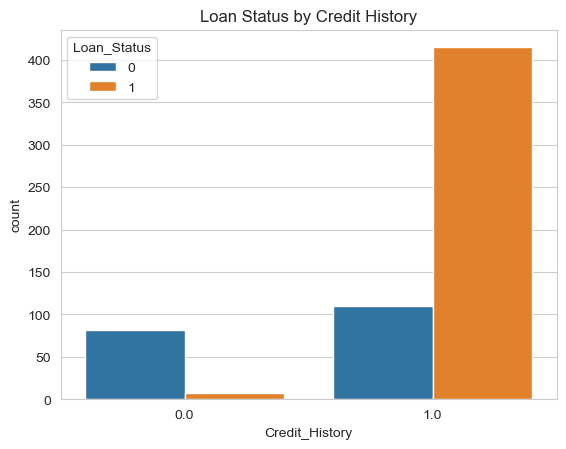

In [22]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)
plt.title("Loan Status by Credit History")

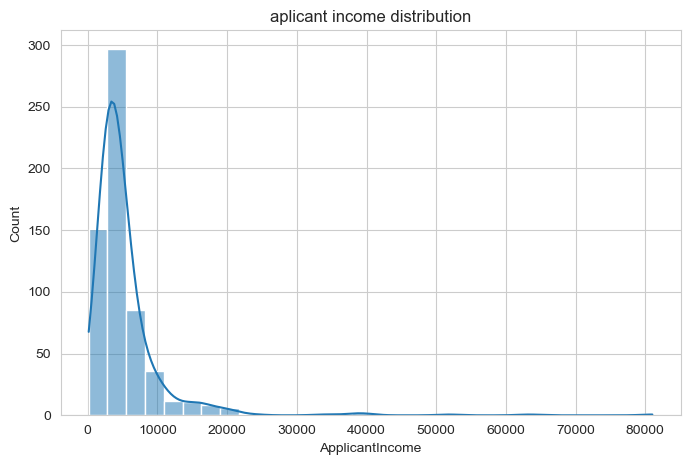

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['ApplicantIncome'],bins=30,kde=True)
plt.title("aplicant income distribution")
plt.show()

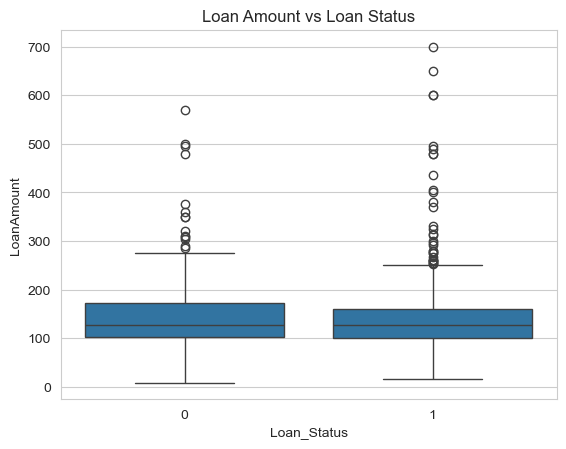

In [24]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title("Loan Amount vs Loan Status")
plt.show()


plt.figure(figsize=(10,6))

numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


Train ML Models

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
x.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [27]:
lr=LogisticRegression(max_iter=1000)

lr.fit(x_train,y_train)

y_prd=lr.predict(x_test)

lr_accuracy=accuracy_score(y_test,y_prd)
print("Logistic Regression Accuracy: ",lr_accuracy)

Logistic Regression Accuracy:  0.7886178861788617


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
dt=DecisionTreeClassifier(random_state=42)

dt.fit(x_train,y_train)

y_prd_dt=dt.predict(x_test)

dt_accuracy=accuracy_score(y_test,y_prd_dt)
print("Decision Tree Accuracy: ",dt_accuracy)

Decision Tree Accuracy:  0.6910569105691057


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [30]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.7560975609756098


In [31]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [lr_accuracy, dt_accuracy, rf_accuracy]
})

models


,Model,Accuracy
0,Logistic Regression,0.788618
1,Decision Tree,0.691057
2,Random Forest,0.756098


In [ ]:
print(classification_report(y_test, y_pred_lr))


In [ ]:
print(classification_report(y_test, y_pred_rf))


In [ ]:
import joblib

joblib.dump(rf, "loan_approval_model.pkl")


In [ ]:
x_train.shape

In [ ]:
print(x_train.columns)

In [ ]:
# Example new applicant (match column order of X)
new_applicant = [[
    1,  # Gender
    1,  # Married
    0,  # Dependents
    1,  # Education
    0,  # Self_Employed
    5000,  # ApplicantIncome
    0,
    150,   # LoanAmount
    360,   # Loan_Amount_Term
    1,     # Credit_History
    1      # Property_Area
]]

prediction = lr.predict(new_applicant)

if prediction[0] == 1:
    print("Loan Approved")
else:
    print("Loan Rejected")
